In [ ]:
# Análisis de texto:

#- Se enfoca en la extracción de información y patrones a partir de textos,
#  generalmente para obtener insights o conocimientos.
#- Implica técnicas como la minería de texto, la clasificación de texto,
#  el agrupamiento de texto y la recuperación de información.
#- Se centra en la estructura y el contenido del texto, pero no
#  necesariamente en su significado o contexto.

# Aplicaciones:

# Análisis de redes sociales.
# Minería de opiniones.
# Extracción de información de documentos.

# Procesamiento de lenguaje natural (PLN):

# - Se enfoca en la interpretación y generación del lenguaje humano por
#   parte de las máquinas.
# - Implica técnicas como el análisis sintáctico, el análisis semántico,
#   la traducción automática y la generación de texto.
#-  Se centra en la comprensión del significado y el contexto del lenguaje,
#   para permitir que las máquinas interactúen con los humanos de manera
# más natural.

#  Aplicaciones:

# Asistentes virtuales (como Siri, Alexa).
# Sistemas de traducción (como Google Translate).
# Chatbots.
# Sistemas de respuesta a preguntas.


# En resumen, el análisis de texto se enfoca en la extracción de información,
# mientras que el PLN se enfoca en la comprensión y generación del lenguaje.
# El PLN es un campo más amplio que incluye el análisis de texto como una
#  de sus subáreas.#



#Explicación:
# punkt: Es un tokenizador preentrenado de nltk que divide el texto en
# palabras y oraciones. Es útil para la tokenización del texto.
# stopwords: Contiene una lista de palabras comunes en inglés
# (y otros idiomas) que suelen ser ignoradas en el análisis de texto,
# como "the", "is", "in", etc.


# pd.read_csv(r'/content/newsCorpora-trimmed.csv'):

# Esta línea carga el archivo CSV ubicado en /content/newsCorpora-trimmed.csv
# en un DataFrame llamado data.
# El prefijo r indica que la cadena es una cadena sin procesar (raw string),
# útil para rutas de archivo en Windows.

# text.lower(): Convierte todo el texto a minúsculas para normalizar
# las palabras.
# word_tokenize(text): Tokeniza el texto en palabras utilizando el
# tokenizador de nltk.
# word.isalpha(): Filtra las palabras para que sólo se mantengan aquellas
# que contienen solo letras (elimina números y caracteres especiales).
# word not in stop_words: Elimina las palabras que están en la lista de
# stopwords.

# Tokenización: Si trabajas con texto en otros idiomas o necesitas un
# tokenizador específico, podrías considerar otras opciones de tokenización.
# Personalización de Stopwords: Puedes ajustar la lista de stopwords según las
# necesidades específicas de tu tarea añadiendo o eliminando palabras
# de la lista.
# Manejo de Excepciones: Puede ser útil agregar manejo de excepciones para
# casos en los que el texto pueda ser None o esté vacío.


# Preprocesamiento: Asegúrate de aplicar el preprocesamiento antes de crear
# el modelo Doc2Vec.
# Entrenamiento del Modelo Doc2Vec: Entrena el modelo Doc2Vec con
# todos los documentos en el DataFrame.
# Vectorización: La función vectorize_doc toma una lista de tokens y
# convierte cada documento en un vector usando infer_vector.
# Entrenamiento y Evaluación: Se crea el conjunto de entrenamiento y #
# prueba, y se entrena el clasificador SVM con los vectores generados.


In [ ]:
!pip install --upgrade pip
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install gensim sklearn pandas nltk
!pip install nltk
!pip install gensim
!pip install matplotlib seaborn

import nltk
from gensim.models.doc2vec import TaggedDocument
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import multiprocessing
import string





  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv(r'/content/newsCorpora-trimmed.csv')
data.columns = ['category', 'text']

In [ ]:
categories = ['t', 'm', ]  # Business, Science and Technology, Entertainment, Health
data = data[data['category'].isin(categories)]

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens



In [ ]:
data['tokens'] = data['text'].apply(preprocess_text)

In [ ]:
print(data.head())

    category                                               text  \
944        t                           Titanfall Review Roundup   
945        t                         Titanfall review: my buddy   
946        t  Respawn: Titanfall's server stability is in Mi...   
947        t  Titanfall's Resolution 'Likely' to be Increase...   
948        t  Xbox One Titanfall Bundle Release Date Tomorro...   

                                                tokens  
944                       [titanfall, review, roundup]  
945                         [titanfall, review, buddy]  
946  [respawn, titanfall, server, stability, micros...  
947          [titanfall, resolution, increased, patch]  
948  [xbox, one, titanfall, bundle, release, date, ...  


In [ ]:
tagged_data = [TaggedDocument(words=row['tokens'], tags=[row['category']]) for index, row in data.iterrows()]


In [ ]:
from gensim.models import Doc2Vec

print(tagged_data)



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
model.save("doc2vec_model")
print("Modelo Doc2Vec guardado como 'doc2vec_model'")

Modelo Doc2Vec guardado como 'doc2vec_model'


In [ ]:
model = Doc2Vec.load("doc2vec_model")

In [ ]:
def vectorize_doc(doc):
    return model.infer_vector(doc.words)


data['vector'] = data['tokens'].apply(lambda x: vectorize_doc(TaggedDocument(x, [0])))

# Crear el conjunto de entrenamiento y prueba
X = list(data['vector'])
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el clasificador SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Evaluar el clasificador
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")




Accuracy: 0.9073893862722201


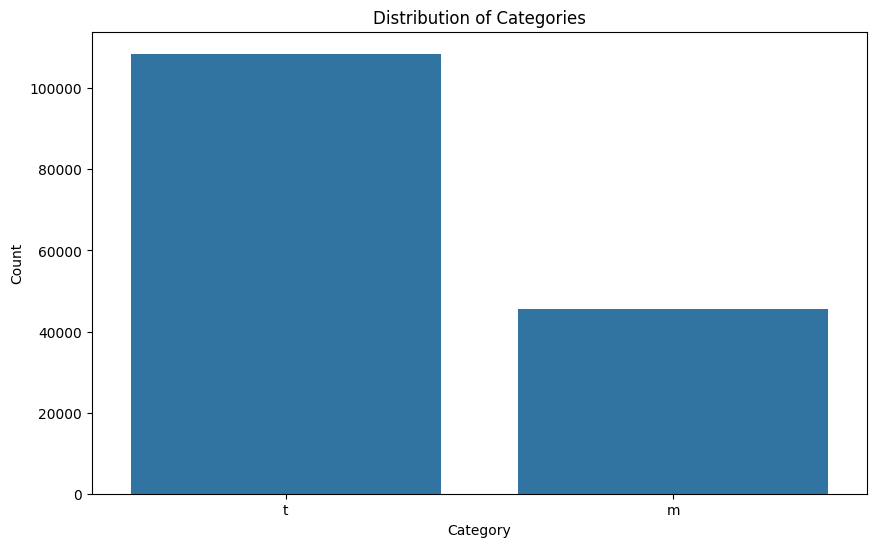

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='category')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
data = pd.read_csv(r'/content/newsCorpora-trimmed.csv')
data.columns = ['category', 'text']

In [ ]:
categories = ['b', 'e', ]  # Business, Science and Technology, Entertainment, Health
data = data[data['category'].isin(categories)]

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [ ]:
data['tokens'] = data['text'].apply(preprocess_text)

In [ ]:
print(data.head())

  category                                               text  \
0        b  Fed official says weak data caused by weather,...   
1        b  Fed's Charles Plosser sees high bar for change...   
2        b  US open: Stocks fall after Fed official hints ...   
3        b  Fed risks falling 'behind the curve', Charles ...   
4        b  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                              tokens  
0  [fed, official, says, weak, data, caused, weat...  
1  [fed, charles, plosser, sees, high, bar, chang...  
2  [us, open, stocks, fall, fed, official, hints,...  
3  [fed, risks, falling, curve, charles, plosser,...  
4  [fed, plosser, nasty, weather, curbed, job, gr...  


In [ ]:
tagged_data = [TaggedDocument(words=row['tokens'], tags=[row['category']]) for index, row in data.iterrows()]

In [ ]:
from gensim.models import Doc2Vec

print(tagged_data)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
model.save("doc2vec_model")
print("Modelo Doc2Vec guardado como 'doc2vec_model'")

Modelo Doc2Vec guardado como 'doc2vec_model'


In [ ]:
model = Doc2Vec.load("doc2vec_model")

In [ ]:
def vectorize_doc(doc):
    return model.infer_vector(doc.words)


data['vector'] = data['tokens'].apply(lambda x: vectorize_doc(TaggedDocument(x, [0])))

# Crear el conjunto de entrenamiento y prueba
X = list(data['vector'])
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el clasificador SVM
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

# Evaluar el clasificador
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8159784226190476


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='category')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install gensim sklearn pandas nltk

import nltk
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import string


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('/content/newsCorpora-trimmed.csv', on_bad_lines='skip')
data.columns = ['category', 'text']

In [ ]:
categories = ['b', 't', 'e', 'm']
data = data[data['category'].isin(categories)]

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())

    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [ ]:
data['tokens'] = data['text'].apply(preprocess_text)
tagged_data = [TaggedDocument(words=row['tokens'], tags=[row['category']]) for index, row in data.iterrows()]

In [ ]:
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


In [ ]:
model = Doc2Vec.load("doc2vec_model")

FileNotFoundError: [Errno 2] No such file or directory: 'doc2vec_model'

In [ ]:
def vectorize_doc(tokens):
    return model.infer_vector(tokens)

data['vector'] = data['tokens'].apply(vectorize_doc)

data['category_num'] = data['category'].map({'t': 0, 'm': 1}).fillna(-1)

X = list(data['vector'])
y = data['category_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)